### Libraries

In [1]:
#Basic and most important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Model evaluation tools
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingRegressor , RandomForestRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore")

### Data Exploration

In [2]:
df=pd.read_csv("TaxiFare (2) (1).csv")  # loading the dataset

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [5]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
1957,52:00.0,9.7,2009-03-14 11:52:00 UTC,-74.005508,40.745742,-73.993675,40.724632,1
24178,33:17.0,8.5,2012-01-25 00:33:17 UTC,-73.987727,40.719911,-73.976760,40.751683,1
40857,11:06.0,11.7,2012-06-20 12:11:06 UTC,-73.990927,40.774973,-73.977028,40.763473,1
49450,25:52.0,3.5,2015-06-28 02:25:52 UTC,-73.988304,40.759174,-73.987251,40.765316,1
7369,44:52.0,11.0,2014-09-02 22:44:52 UTC,-73.988624,40.758953,-73.975724,40.791357,2
31893,38:52.0,7.5,2012-09-27 07:38:52 UTC,-73.992090,40.758166,-73.976997,40.755170,1
39927,52:32.0,8.9,2011-12-10 19:52:32 UTC,-73.977042,40.776766,-73.960802,40.764858,2
18986,30:26.0,11.3,2011-10-31 12:30:26 UTC,-74.004644,40.718896,-73.983916,40.761719,1
33586,50:10.0,7.0,2014-04-08 23:50:10 UTC,-73.985944,40.758587,-73.987253,40.768614,2
2376,58:00.0,16.5,2012-03-08 22:58:00 UTC,-74.008238,40.720640,-73.951420,40.730355,2


In [6]:
df.isnull().sum()  ## 0 missing values

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
df.shape

(50000, 8)

In [8]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


### Data Visualization

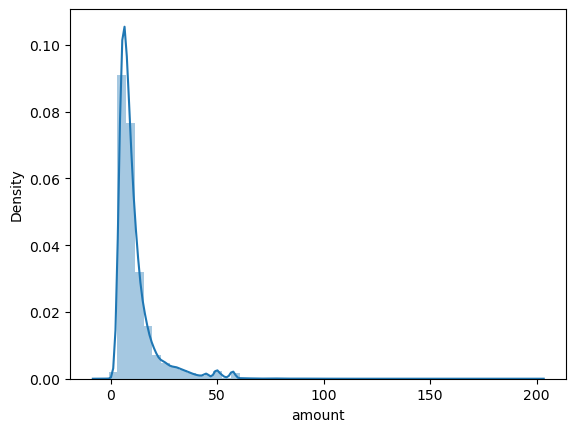

In [10]:
sns.distplot(df["amount"])
plt.show()  ## 1 numerical distribution

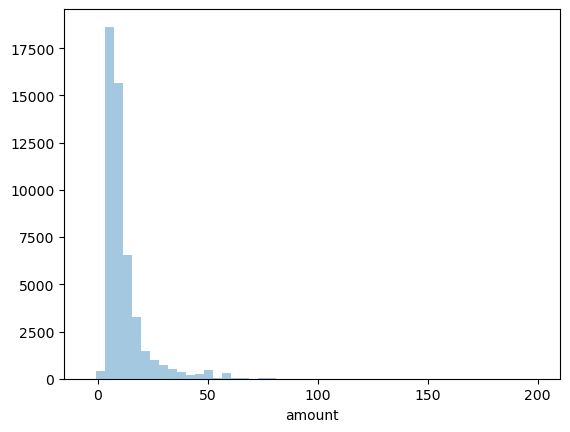

In [11]:
sns.distplot(df["amount"],kde=False)
plt.show()

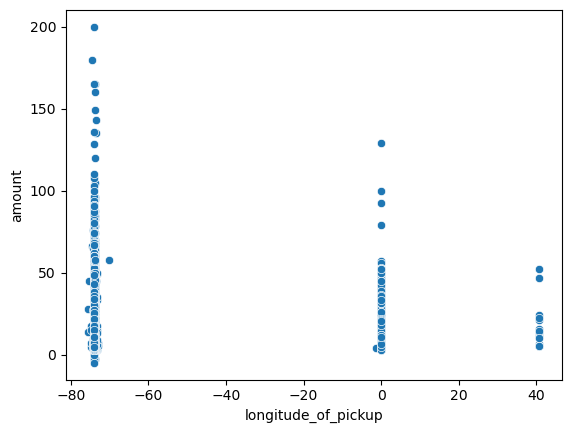

In [12]:
sns.scatterplot(x="longitude_of_pickup",y="amount",data=df) # numerical correlation bw numericals we see
plt.show()

<Axes: >

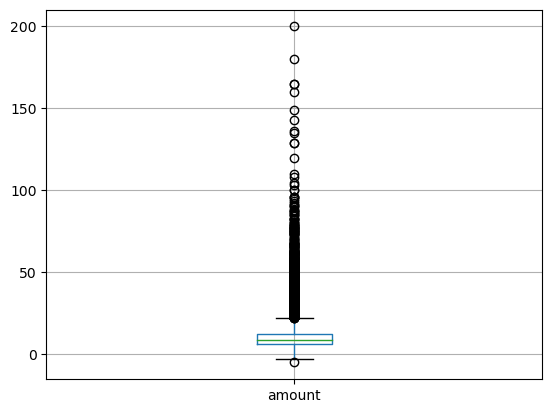

In [13]:
df.boxplot(column=["amount"])

### Data Cleaning

In [14]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [15]:
iqr=12.5-6
iqr

6.5

In [16]:
6-(1.5*6.5)

-3.75

In [17]:
12+(1.5*6.5)

21.75

<Axes: xlabel='amount'>

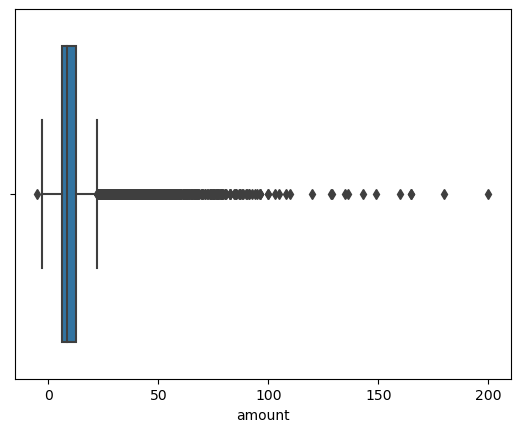

In [18]:
sns.boxplot(x="amount",data=df)

<Axes: >

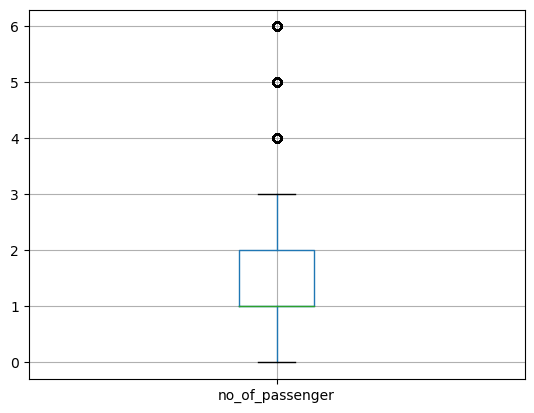

In [19]:
df.boxplot(column=["no_of_passenger"])

<Axes: >

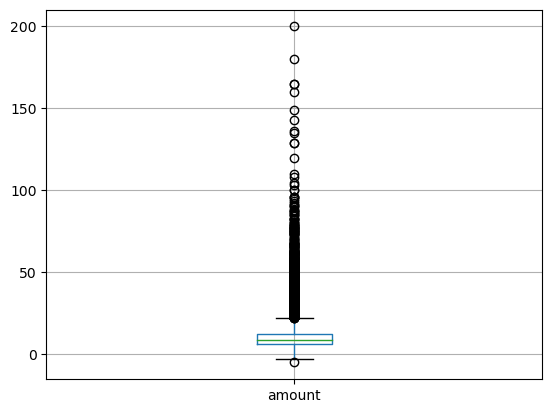

In [20]:
df.boxplot(column=["amount"])

<Axes: >

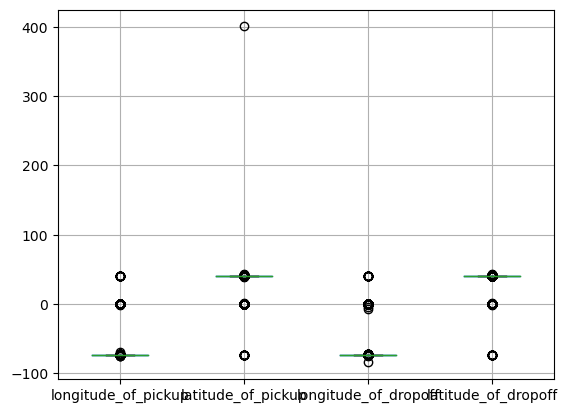

In [21]:
df[['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff']].boxplot()

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [23]:
l,u=remove_outlier(df['longitude_of_pickup'])
df["longitude_of_pickup"]=np.where(df["longitude_of_pickup"]>u,u,df["longitude_of_pickup"])
df["longitude_of_pickup"]=np.where(df["longitude_of_pickup"]<l,l,df["longitude_of_pickup"])

In [24]:
l,u=remove_outlier(df['latitude_of_pickup'])
df["latitude_of_pickup"]=np.where(df["latitude_of_pickup"]>u,u,df["latitude_of_pickup"])
df["latitude_of_pickup"]=np.where(df["latitude_of_pickup"]<l,l,df["latitude_of_pickup"])

In [25]:
l,u=remove_outlier(df['longitude_of_dropoff'])
df["longitude_of_dropoff"]=np.where(df["longitude_of_dropoff"]>u,u,df["longitude_of_dropoff"])
df["longitude_of_dropoff"]=np.where(df["longitude_of_dropoff"]<l,l,df["longitude_of_dropoff"])

In [26]:
l,u=remove_outlier(df['latitude_of_dropoff'])
df["latitude_of_dropoff"]=np.where(df["latitude_of_dropoff"]>u,u,df["latitude_of_dropoff"])
df["latitude_of_dropoff"]=np.where(df["latitude_of_dropoff"]<l,l,df["latitude_of_dropoff"])

In [27]:
l,u=remove_outlier(df['amount'])
df["amount"]=np.where(df["amount"]>u,u,df["amount"])
df["amount"]=np.where(df["amount"]<l,l,df["amount"])

<Axes: >

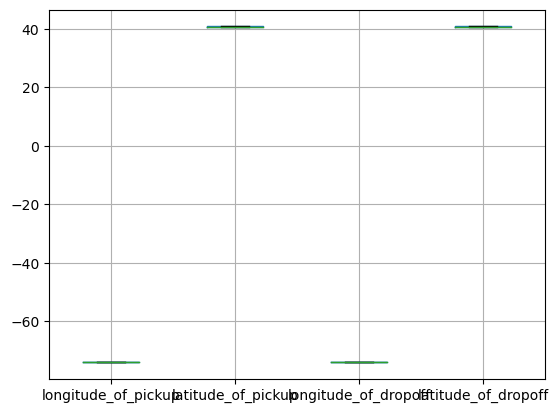

In [28]:
df[['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff']].boxplot()

<Axes: >

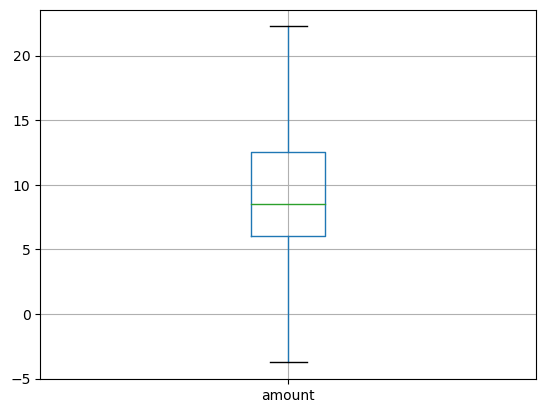

In [29]:
df.boxplot(column=["amount"])

In [30]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


In [31]:
correlation_mat = df.corr()

<Axes: >

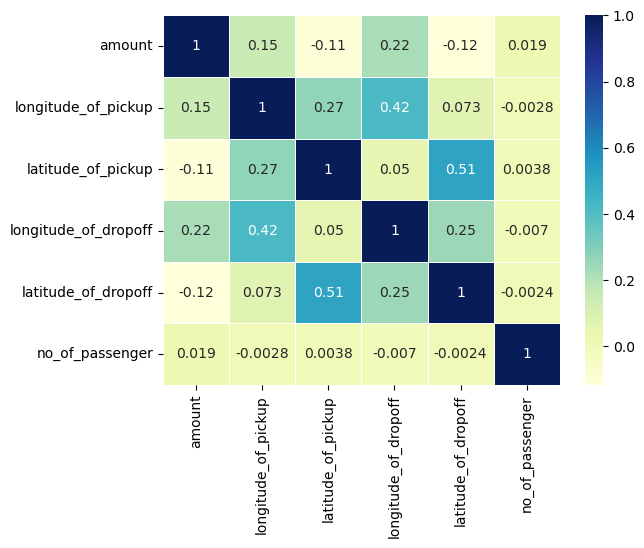

In [32]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

#### here  unique_id and date_time_of_pickup are not correlated so we can remove them

### Training and Testing by splitting data

In [33]:
#lets build our linear model
#independent variables
x=df.drop(columns=["unique_id","date_time_of_pickup","amount"]) #has unique_id and date_time_of_pickup are not required
#dependent variable
y=df["amount"]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [35]:
m1=LinearRegression()

In [36]:
m1.fit(x_train,y_train)

LinearRegression()

In [37]:
m1.score(x_train,y_train)

0.08352313099018527

In [38]:
m1.score(x_test,y_test)

0.09588958000467585

In [39]:
m2=DecisionTreeRegressor(max_depth=8)

In [40]:
m2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [41]:
m2.score(x_train,y_train)

0.5867630173929179

In [42]:
m2.score(x_test,y_test)

0.5694747483043375

In [43]:
m3=AdaBoostRegressor(n_estimators=10)

In [44]:
m3.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=10)

In [45]:
m3.score(x_train,y_train)

0.3317368166384622

In [46]:
m3.score(x_test,y_test)

0.32681857007222204

In [47]:
m4=GradientBoostingRegressor()

In [48]:
m4.fit(x_train,y_train)

GradientBoostingRegressor()

In [49]:
m4.score(x_train,y_train)

0.6608861419374953

In [50]:
m4.score(x_test,y_test)

0.6613480704307961

In [51]:
m5=RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_leaf=5,
                      n_jobs=-1, random_state=42)

In [52]:
m5.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_leaf=5,
                      n_jobs=-1, random_state=42)

In [53]:
m5.score(x_train,y_train) 

0.6374355272312887

In [54]:
m5.score(x_test,y_test)

0.6235994520469402

In [60]:
from sklearn.svm import SVR
m6=SVR()

In [61]:
m6=SVR()

In [62]:
m6.fit(x_train,y_train)

SVR()

In [63]:
m6.score(x_train,y_train)

-0.09767418913820225

In [64]:
m6.score(x_test,y_test)

-0.09238297966603026